In [50]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import sys

In [51]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)
            plt.plot(self.trace[:,0], self.trace[:,1])

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        return x1 - self.alpha*self.calculate_func_grad(x1, x2)[0], x2 - self.alpha*self.calculate_func_grad(x1, x2)[1]

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=True)->float:
        x1 = x1_init
        x2 = x2_init
        self.trace = np.array([x1, x2])
        for i in range(steps):
            derivative_x1, derivative_x2 = self.calculate_func_grad(x1, x2)
            if math.sqrt((self.alpha*derivative_x1)**2 + (self.alpha*derivative_x2)**2) < sys.float_info.epsilon:
                break
            x1 = self.gradient_descent_step(x1, x2)[0]
            x2 = self.gradient_descent_step(x1, x2)[1]
            self.trace = np.vstack([self.trace, [x1, x2]])
            if verbose > 0:
                info = f"Iteration:{i+1}; Point: {x1:.5f}, {x2:.5f}"
                info_val = f"; Value: {self.calculate_func_vale(x1, x2):.5f}"
            if verbose == 1:
                if i % 5 == 0:
                    print(info)
            if verbose == 2:
                print(info + info_val)
            if verbose == 3:
                print(info + info_val + f"; Gradient: {derivative_x1:.5f}, {derivative_x2:.5f}")
        if plot:
            self.plot_func()
            plt.show()
        return self.calculate_func_vale(x1, x2)


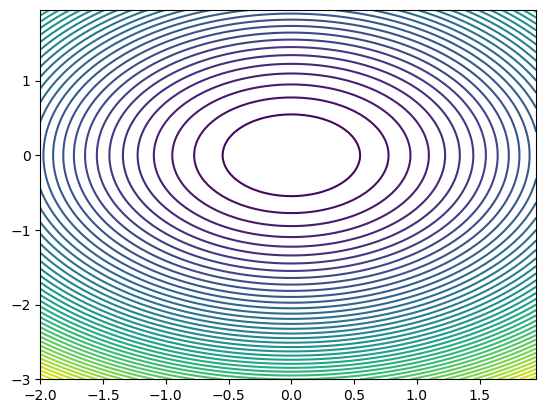

In [52]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

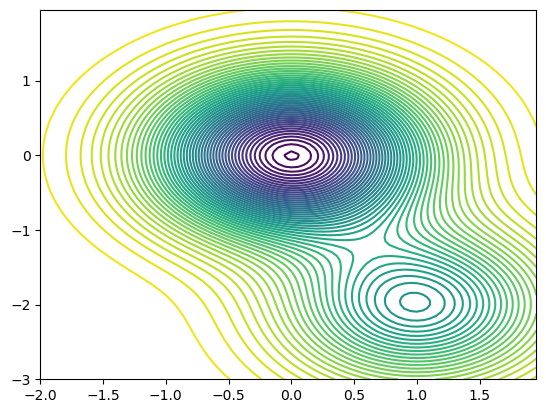

In [53]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Alpha: 0.1 for function f:


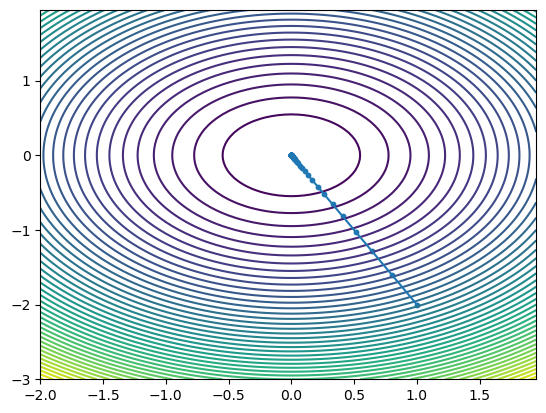

Alpha: 0.2 for function f:


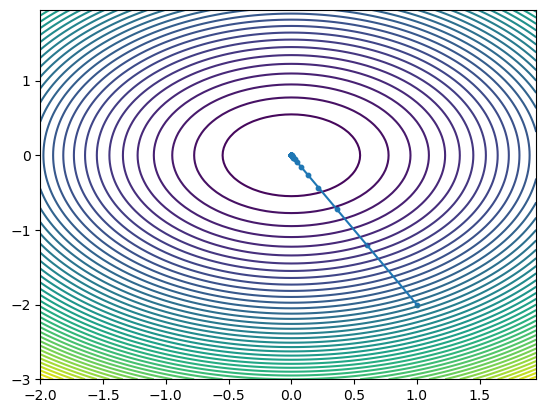

Alpha: 0.5 for function f:


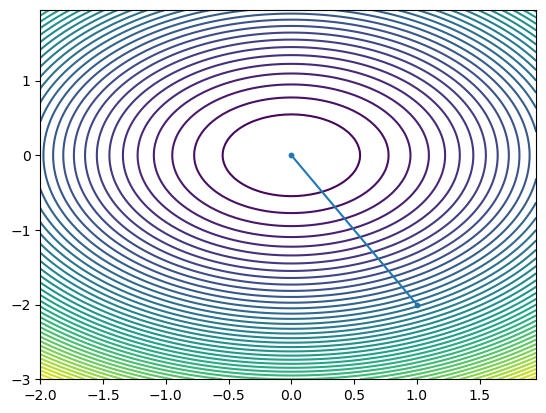

Alpha: 0.8 for function f:


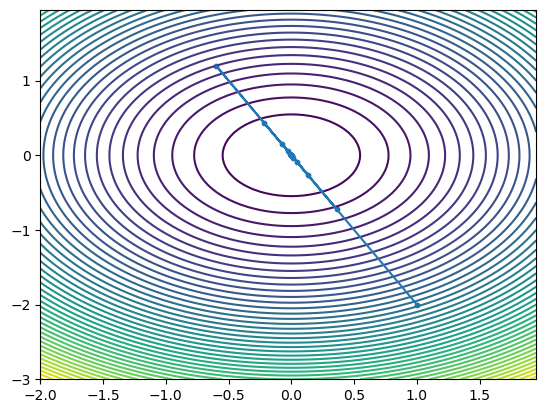

Alpha: 0.1 for function g:


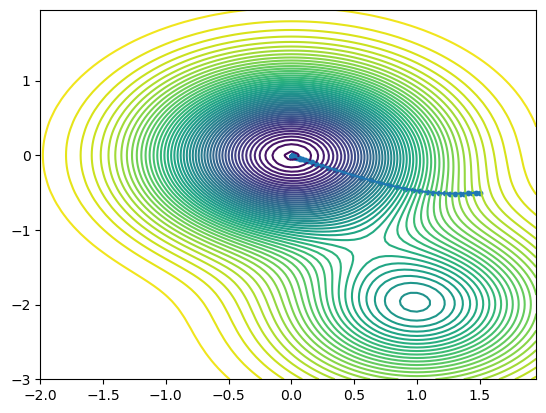

Alpha: 0.2 for function g:


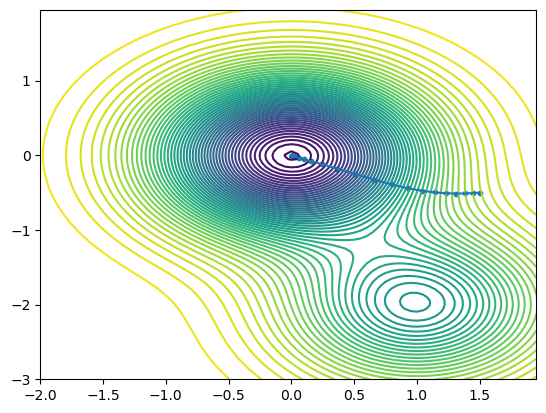

Alpha: 0.5 for function g:


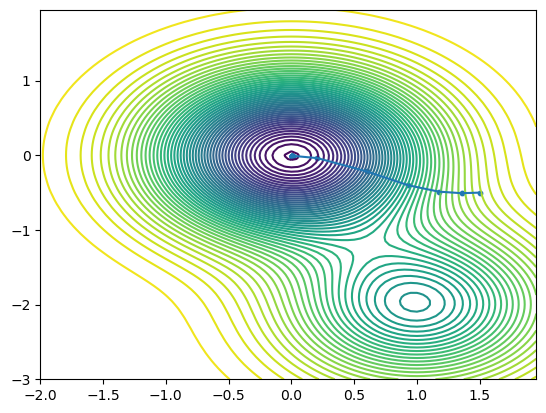

Alpha: 0.8 for function g:


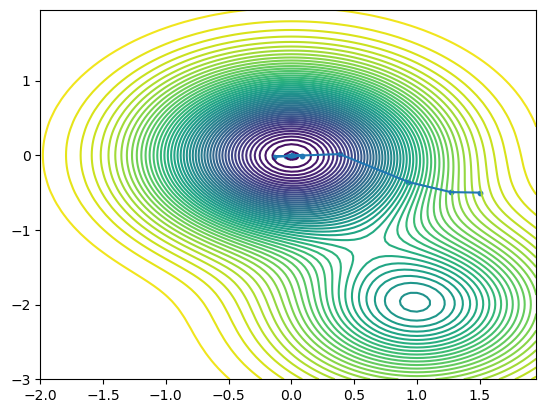

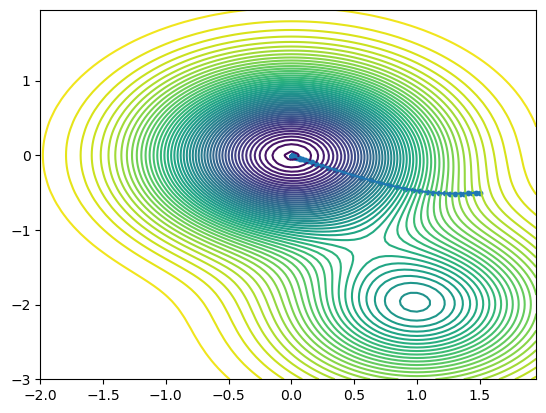

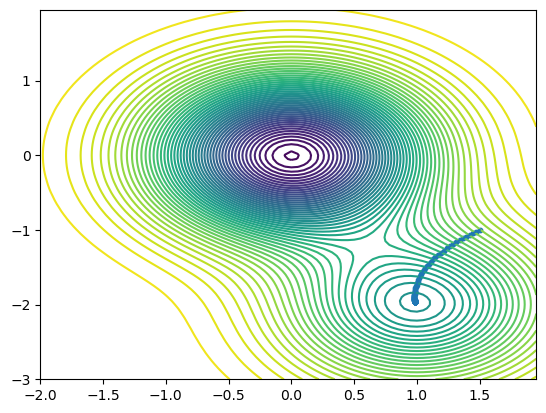

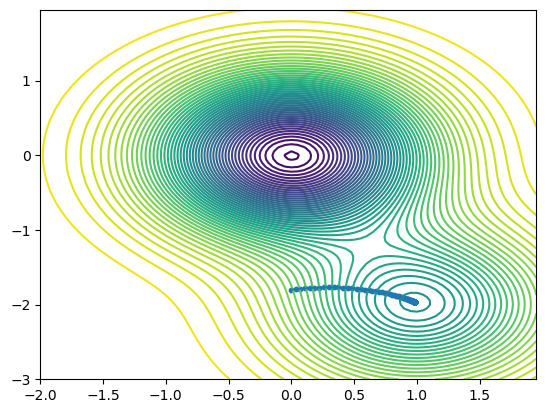

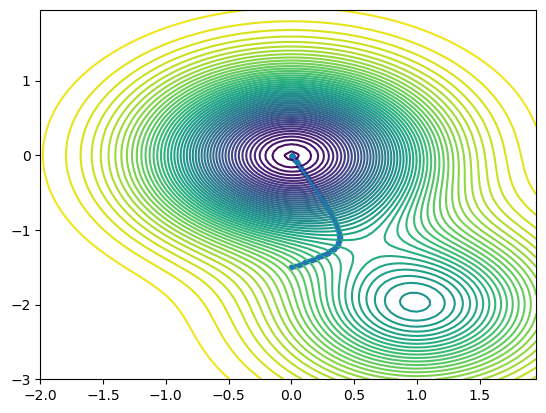

Iteration:1; Point: 1.47127, -0.50372
Iteration:6; Point: 1.30264, -0.51391
Iteration:11; Point: 1.07828, -0.49212
Iteration:16; Point: 0.77427, -0.39836
Iteration:21; Point: 0.41449, -0.22808
Iteration:26; Point: 0.16160, -0.09550
Iteration:31; Point: 0.05735, -0.03847
Iteration:36; Point: 0.02146, -0.01792
Iteration:41; Point: 0.00946, -0.01075
Iteration:46; Point: 0.00547, -0.00826
Iteration:51; Point: 0.00414, -0.00740
Iteration:56; Point: 0.00370, -0.00711
Iteration:61; Point: 0.00355, -0.00701
Iteration:66; Point: 0.00350, -0.00697
Iteration:71; Point: 0.00348, -0.00696
Iteration:76; Point: 0.00348, -0.00695
Iteration:81; Point: 0.00348, -0.00695
Iteration:86; Point: 0.00348, -0.00695
Iteration:91; Point: 0.00348, -0.00695
Iteration:96; Point: 0.00348, -0.00695
Iteration:101; Point: 0.00348, -0.00695
Iteration:106; Point: 0.00348, -0.00695
Iteration:111; Point: 0.00348, -0.00695
Iteration:116; Point: 0.00348, -0.00695
Iteration:121; Point: 0.00348, -0.00695
Iteration:126; Point: 

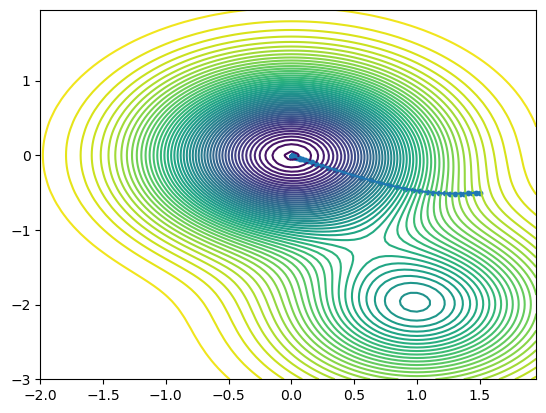

Iteration:1; Point: 1.47127, -0.50372; Value: 1.36826
Iteration:2; Point: 1.44104, -0.50705; Value: 1.35875
Iteration:3; Point: 1.40919, -0.50988; Value: 1.34825
Iteration:4; Point: 1.37561, -0.51208; Value: 1.33659
Iteration:5; Point: 1.34014, -0.51348; Value: 1.32363
Iteration:6; Point: 1.30264, -0.51391; Value: 1.30915
Iteration:7; Point: 1.26294, -0.51313; Value: 1.29292
Iteration:8; Point: 1.22087, -0.51089; Value: 1.27464
Iteration:9; Point: 1.17621, -0.50687; Value: 1.25395
Iteration:10; Point: 1.12876, -0.50075; Value: 1.23040
Iteration:11; Point: 1.07828, -0.49212; Value: 1.20345
Iteration:12; Point: 1.02456, -0.48059; Value: 1.17249
Iteration:13; Point: 0.96738, -0.46575; Value: 1.13679
Iteration:14; Point: 0.90660, -0.44723; Value: 1.09564
Iteration:15; Point: 0.84217, -0.42479; Value: 1.04843
Iteration:16; Point: 0.77427, -0.39836; Value: 0.99495
Iteration:17; Point: 0.70337, -0.36819; Value: 0.93563
Iteration:18; Point: 0.63037, -0.33490; Value: 0.87196
Iteration:19; Point

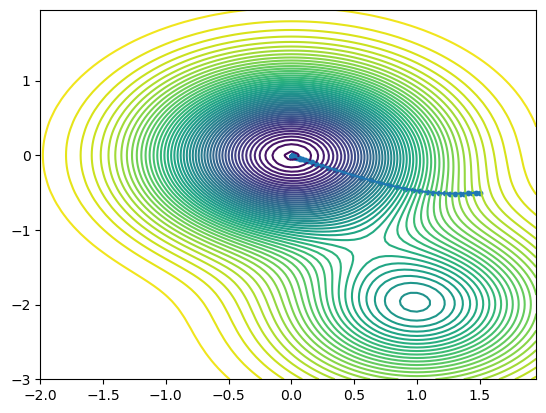

Iteration:1; Point: 1.47127, -0.50372; Value: 1.36826; Gradient: 0.28730, 0.04104
Iteration:2; Point: 1.44104, -0.50705; Value: 1.35875; Gradient: 0.30231, 0.03798
Iteration:3; Point: 1.40919, -0.50988; Value: 1.34825; Gradient: 0.31846, 0.03400
Iteration:4; Point: 1.37561, -0.51208; Value: 1.33659; Gradient: 0.33588, 0.02889
Iteration:5; Point: 1.34014, -0.51348; Value: 1.32363; Gradient: 0.35467, 0.02243
Iteration:6; Point: 1.30264, -0.51391; Value: 1.30915; Gradient: 0.37498, 0.01436
Iteration:7; Point: 1.26294, -0.51313; Value: 1.29292; Gradient: 0.39696, 0.00435
Iteration:8; Point: 1.22087, -0.51089; Value: 1.27464; Gradient: 0.42077, -0.00793
Iteration:9; Point: 1.17621, -0.50687; Value: 1.25395; Gradient: 0.44657, -0.02286
Iteration:10; Point: 1.12876, -0.50075; Value: 1.23040; Gradient: 0.47452, -0.04084
Iteration:11; Point: 1.07828, -0.49212; Value: 1.20345; Gradient: 0.50474, -0.06221
Iteration:12; Point: 1.02456, -0.48059; Value: 1.17249; Gradient: 0.53722, -0.08727
Iteratio

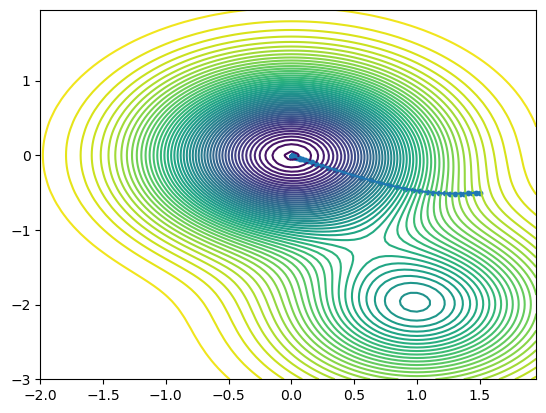

0.4965724836763416

In [54]:
# Plots and tests

def f(x1, x2):
    return x1**2 + x2**2

def g(x1, x2):
    return 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2))

def grad_f(x1, x2):
    return 2*x1, 2*x2

def grad_g(x1, x2):
    derivative_x1 = 2*x1*math.exp(-x1**2-x2**2)+(x1-1)*math.exp(-(x1-1)**2-(x2+2)**2)
    derivative_x2 = 2*x2*math.exp(-x1**2-x2**2)+(x2+2)*math.exp(-(x1-1)**2-(x2+2)**2)
    return derivative_x1, derivative_x2

simple_grad_f_01 = SimpleGradientDescent(f, grad_f)
simple_grad_g_01 = SimpleGradientDescent(g, grad_g)

simple_grad_f_02 = SimpleGradientDescent(f, grad_f, 0.2)
simple_grad_g_02 = SimpleGradientDescent(g, grad_g, 0.2)

simple_grad_f_05 = SimpleGradientDescent(f, grad_f, 0.5)
simple_grad_g_05 = SimpleGradientDescent(g, grad_g, 0.5)

simple_grad_f_08 = SimpleGradientDescent(f, grad_f, 0.8)
simple_grad_g_08 = SimpleGradientDescent(g, grad_g, 0.8)

# Different alpha values for function f
print(f"Alpha: {simple_grad_f_01.alpha} for function f:")
simple_grad_f_01.minimize(1, -2, 1000)
print(f"Alpha: {simple_grad_f_02.alpha} for function f:")
simple_grad_f_02.minimize(1, -2, 1000)
print(f"Alpha: {simple_grad_f_05.alpha} for function f:")
simple_grad_f_05.minimize(1, -2, 1000)
print(f"Alpha: {simple_grad_f_08.alpha} for function f:")
simple_grad_f_08.minimize(1, -2, 1000)

# Different alpha values for function g
print(f"Alpha: {simple_grad_g_01.alpha} for function g:")
simple_grad_g_01.minimize(1.5, -0.5, 1000)
print(f"Alpha: {simple_grad_g_02.alpha} for function g:")
simple_grad_g_02.minimize(1.5, -0.5, 1000)
print(f"Alpha: {simple_grad_g_05.alpha} for function g:")
simple_grad_g_05.minimize(1.5, -0.5, 1000)
print(f"Alpha: {simple_grad_g_08.alpha} for function g:")
simple_grad_g_08.minimize(1.5, -0.5, 1000)

# Different starting points for function g with more than one extremum

simple_grad_g_01.minimize(1.5, -0.5, 1000)
simple_grad_g_01.minimize(1.5, -1, 1000)
simple_grad_g_01.minimize(0, -1.8, 1000)
simple_grad_g_01.minimize(0, -1.5, 1000)

# Different verbose values

simple_grad_g_01.minimize(1.5, -0.5, 1000, 1)
simple_grad_g_01.minimize(1.5, -0.5, 1000, 2)
simple_grad_g_01.minimize(1.5, -0.5, 1000, 3)


